<a href="https://colab.research.google.com/github/sainiankur63/DevOps/blob/master/FinalNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

In [2]:
# To show all columns' names on a large pandas dataframe
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)
pd.set_option('display.max_columns', None)

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'


od.download(dataset_url)

data_dir = './craigslist-carstrucks-data'

Skipping, found downloaded files in "./craigslist-carstrucks-data" (use force=True to force download)


In [4]:
# Taking 10 percent fraction of the dataset
sample_frac = 0.1


import random

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/vehicles.csv", skiprows=skip_row)

In [5]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,42753.000,42753.000,42628.000,42289.000,0.000,42046.000,42046.000
mean,7311454449.223,105148.023,2011.227,97208.376,nan,38.510,-94.752
std,4560180.477,18073074.335,9.404,180850.953,nan,5.809,18.340
min,7216549243.000,0.000,1900.000,0.000,nan,-34.613,-159.469
25%,7308129668.000,5900.000,2008.000,37647.000,nan,34.640,-111.984
50%,7312509327.000,13790.000,2013.000,86000.000,nan,39.160,-88.423
75%,7315245979.000,25995.000,2017.000,133846.000,nan,42.426,-80.830
max,7317098055.000,3736928711.000,2022.000,10000000.000,nan,64.948,94.163


In [6]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
1,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
2,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN
3,7217788283,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
4,7218423006,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN
5,7219973522,https://lacrosse.craigslist.org/cto/d/la-cross...,la crosse,https://lacrosse.craigslist.org,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wi,NaN,NaN,NaN
6,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-04T12:31:18-0500
7,7315715960,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-02T08:44:35-0500
8,7315275942,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2019.0,ford,ranger supercrew xl pickup,good,NaN,other,1834.0,clean,other,1FTER4EH3KLA31326,NaN,NaN,pickup,black,https://images.craigslist.org/00202_4Fz2gXkV8p...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-01T09:21:34-0500
9,7312799035,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,31990,2013.0,toyota,tundra double cab pickup,good,8 cylinders,gas,55068.0,clean,other,5TFUY5F19DX303623,4wd,NaN,pickup,NaN,https://images.craigslist.org/00f0f_dQ1UfxDq7n...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-04-26T10:01:19-0500


**DROP FEATURES**

In [7]:
df.drop(['id', 'url','region_url', 'VIN', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date'],axis =1 , inplace = True)

In [8]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,price,year,odometer
count,42753.000,42628.000,42289.000
mean,105148.023,2011.227,97208.376
std,18073074.335,9.404,180850.953
min,0.000,1900.000,0.000
25%,5900.000,2008.000,37647.000
50%,13790.000,2013.000,86000.000
75%,25995.000,2017.000,133846.000
max,3736928711.000,2022.000,10000000.000


**OUTLIER REMOVAL - price**

In [9]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.price.quantile(0.75)-df.price.quantile(0.25)

#### Extreme outliers
lower_lim_price = df['price'].quantile(0.25) - ( IQR * 1.5 )
upper_lim_price = df['price'].quantile(0.75) +  ( IQR * 1.5 )

print("Price value for LOWER bound: ",lower_lim_price)
print("Price value for UPPER bound: ",upper_lim_price)

Price value for LOWER bound:  -24242.5
Price value for UPPER bound:  56137.5


In [10]:
# Taking 500 dollars as min and 57364 dollars max value for price

df = df[(df.price >=  480) & (df.price <= 57364)]

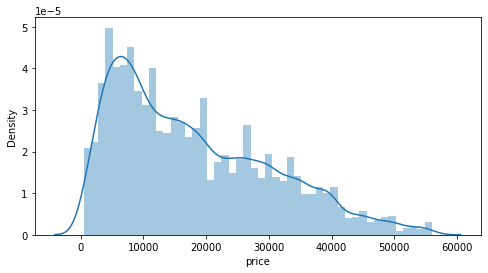

In [11]:
sns.distplot(df[(df.price >=  480) & (df.price <= 56137)].price)

**OUTLIER REMOVAL - year**

In [12]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.year.quantile(0.75)-df.year.quantile(0.25)

#### Extreme outliers
lower_lim_year = df['year'].quantile(0.25) - ( IQR * 1.5 )
upper_lim_year = df['year'].quantile(0.75) +  ( IQR * 1.5 )

print("Minimum Year value : ",lower_lim_year)
print("Maximum Year value: ",upper_lim_year)

Minimum Year value :  1994.5
Maximum Year value:  2030.5


In [13]:
# Taking year greater than 1994

df = df[(df['year'] >=  1994)]

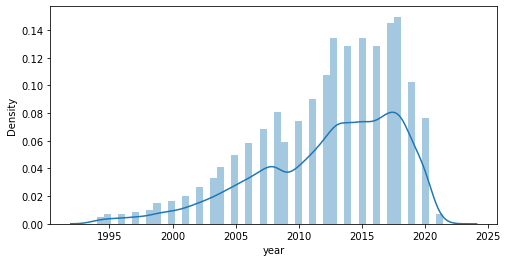

In [14]:
sns.distplot(df.year)

In [15]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,price,year,odometer
count,36196.000,36196.000,35990.000
mean,18183.712,2012.253,97654.239
std,12580.364,5.626,112157.004
min,484.000,1994.000,0.000
25%,7700.000,2008.000,40166.000
50%,15500.000,2013.000,90892.500
75%,26990.000,2017.000,138000.000
max,57000.000,2022.000,9999999.000


**OUTLIER REMOVAL - odometer**

In [16]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR = df.odometer.quantile(0.75) - df.odometer.quantile(0.25)

#### Extreme outliers
lower_lim_odometer = df['odometer'].quantile(0.25) - ( IQR * 1.5 )
upper_lim_odometer = df['odometer'].quantile(0.75) + ( IQR * 1.5 )

print("Min odometer value : ",lower_lim_odometer)
print("Max odometer value: ",upper_lim_odometer)

Min odometer value :  -106585.0
Max odometer value:  284751.0


In [17]:
# Set 200 miles as the lower limit and 284751 miles Upper limit 
df = df[(df.odometer >=  200) & (df.odometer <= 284751)]

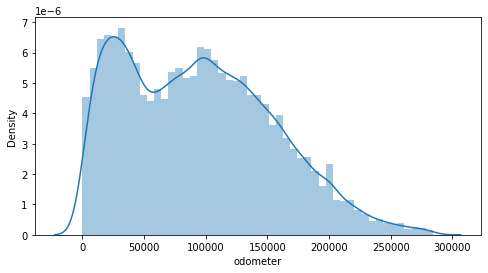

In [18]:
sns.distplot(df.odometer)

Text(0.5, 1.0, 'Graph for NULL data ')

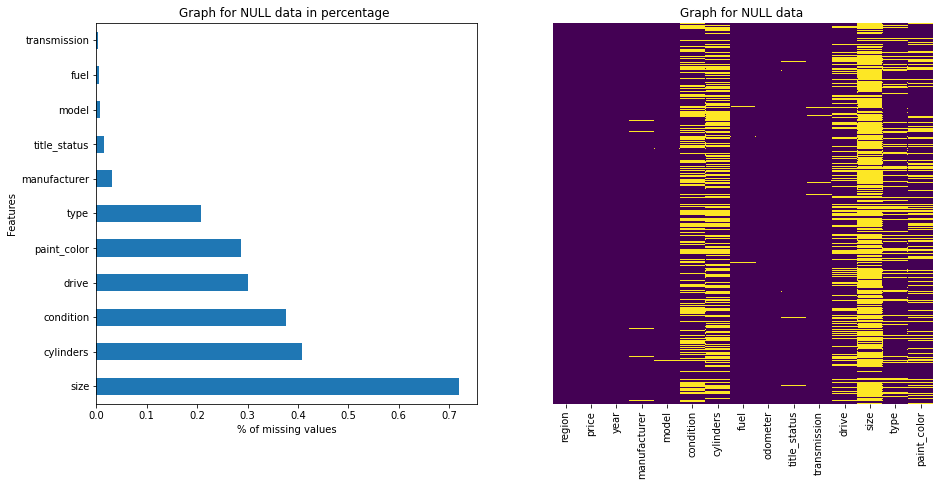

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
 
plt.subplot(1,2,1) 
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
# Plot a graph to check missing percentages 
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

plt.subplot(1,2,2)
# creating a graph to check null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Graph for NULL data ")

In [20]:
Null_Values = df.isna().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Null_Values' : Null_Values,'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'],ascending=False)

,Null_Values,percent_missing
size,25305,71.895332
cylinders,14367,40.818820
condition,13276,37.719124
drive,10559,29.999716
paint_color,10069,28.607552
type,7320,20.797227
manufacturer,1093,3.105378
title_status,566,1.608092
model,270,0.767111
fuel,177,0.502884


### **Handling Missing and Null Values** 


**Transmission**

In [21]:
print("Number of null values before handling in transmission :" ,df['transmission'].isnull().sum())

Number of null values before handling in transmission : 145


In [22]:
# Replacing null values in transmission column

df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])

In [23]:
print("Number of null values After handling in transmission :" ,df['transmission'].isnull().sum())

Number of null values After handling in transmission : 0


**Fuel**

In [24]:
print("Number of null values before handling in fuel :" ,df['fuel'].isnull().sum())

Number of null values before handling in fuel : 177


In [25]:
# Replacing null values in fuel column

df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0])

In [26]:
print("Number of null values after handling in fuel :" ,df['fuel'].isnull().sum())

Number of null values after handling in fuel : 0


**Model**

In [27]:
print("Number of null values before handling in model :" ,df['model'].isnull().sum())

Number of null values before handling in model : 270


In [28]:
# Replacing null values in model column

df['model'] = df['model'].fillna(df.title_status.mode()[0])

In [29]:
print("Number of null values after handling in model :" ,df['model'].isnull().sum())

Number of null values after handling in model : 0


**Title_status**

In [30]:
print("Number of null values before handling in title_status :" ,df['title_status'].isnull().sum())

Number of null values before handling in title_status : 566


In [31]:
# Replacing null values in title_status column

df['title_status'] = df['title_status'].fillna(df.title_status.mode()[0])

In [32]:
print("Number of null values after handling in title_status :" ,df['title_status'].isnull().sum())

Number of null values after handling in title_status : 0


**Manufacturer**

In [33]:
print("Number of null values before handling in manufacturer :" ,df['manufacturer'].isnull().sum())

Number of null values before handling in manufacturer : 1093


In [34]:
# Replacing null values in manufacturer column

df['manufacturer'] = df['manufacturer'].fillna(df.manufacturer.mode()[0])

In [35]:
print("Number of null values after handling in manufacturer :" ,df['manufacturer'].isnull().sum())

Number of null values after handling in manufacturer : 0


**Type**

In [36]:
print("Number of null values before handling in type :" ,df['type'].isnull().sum())

Number of null values before handling in type : 7320


In [37]:
# Replacing null values in type column

df['type'] = df['type'].fillna(df.type.mode()[0])

In [38]:
print("Number of null values after handling in type :" ,df['type'].isnull().sum())

Number of null values after handling in type : 0


**Paint_color**

In [39]:
print("Number of null values before handling in paint_color :" ,df['paint_color'].isnull().sum())

Number of null values before handling in paint_color : 10069


In [40]:
# Replacing null values in paint_color column

df['paint_color'] = df['paint_color'].fillna(df.paint_color.mode()[0])

In [41]:
print("Number of null values after handling in paint_color :" ,df['paint_color'].isnull().sum())

Number of null values after handling in paint_color : 0


**Drive**

In [42]:
print("Number of null values before handling in drive :" ,df['drive'].isnull().sum())

Number of null values before handling in drive : 10559


In [43]:
# Replacing null values in drive column

df['drive'] = df['drive'].fillna(df.drive.mode()[0])

In [44]:
print("Number of null values after handling in drive :" ,df['drive'].isnull().sum())

Number of null values after handling in drive : 0


**Condition**

In [45]:
print("Number of null values before handling in condition :" ,df['condition'].isnull().sum())

Number of null values before handling in condition : 13276


In [46]:
# Replacing null values in condition column

df['condition'] = df['condition'].fillna(df.condition.mode()[0])

In [47]:
print("Number of null values after handling in condition :" ,df['condition'].isnull().sum())

Number of null values after handling in condition : 0


**Cylinders**

In [48]:
print("Number of null values before handling in cylinders :" ,df['cylinders'].isnull().sum())

Number of null values before handling in cylinders : 14367


In [49]:
# Replacing null values in cylinders column

df['cylinders'] = df['cylinders'].fillna(df.cylinders.mode()[0])

In [50]:
print("Number of null values after handling in cylinders :" ,df['cylinders'].isnull().sum())

Number of null values after handling in cylinders : 0


**Size**

In [51]:
print("Number of null values before handling in size :" ,df['size'].isnull().sum())

Number of null values before handling in size : 25305


In [52]:
# Replacing null values in size column

df['size'] = df['size'].fillna(df['size'].mode()[0])

In [53]:
print("Number of null values after handling in size :" ,df['size'].isnull().sum())

Number of null values after handling in size : 0


In [54]:
# Checking null values again
Null_Values = df.isna().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Null_Values' : Null_Values,'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'],ascending=False)

,Null_Values,percent_missing
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35197 entries, 6 to 42752
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        35197 non-null  object 
 1   price         35197 non-null  int64  
 2   year          35197 non-null  float64
 3   manufacturer  35197 non-null  object 
 4   model         35197 non-null  object 
 5   condition     35197 non-null  object 
 6   cylinders     35197 non-null  object 
 7   fuel          35197 non-null  object 
 8   odometer      35197 non-null  float64
 9   title_status  35197 non-null  object 
 10  transmission  35197 non-null  object 
 11  drive         35197 non-null  object 
 12  size          35197 non-null  object 
 13  type          35197 non-null  object 
 14  paint_color   35197 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 4.3+ MB


In [56]:
df.cylinders.value_counts()

6 cylinders     22601
4 cylinders      6676
8 cylinders      5532
5 cylinders       172
10 cylinders       85
other              64
3 cylinders        59
12 cylinders        8
Name: cylinders, dtype: int64

**Encoding categorical variables**

In [57]:
# importing label encoder from sklearn module

from sklearn import preprocessing
LabelEncoding = preprocessing.LabelEncoder()

In [58]:
# Extracting categorical columns from the DataFrame df
categorical_columns = [i for i in df.columns if df.dtypes[i]=='object']

In [59]:
# code for converting all categorical data to numbeic using label encoding 
for i in categorical_columns:
  df[i] = LabelEncoding.fit_transform(df[i])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35197 entries, 6 to 42752
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        35197 non-null  int64  
 1   price         35197 non-null  int64  
 2   year          35197 non-null  float64
 3   manufacturer  35197 non-null  int64  
 4   model         35197 non-null  int64  
 5   condition     35197 non-null  int64  
 6   cylinders     35197 non-null  int64  
 7   fuel          35197 non-null  int64  
 8   odometer      35197 non-null  float64
 9   title_status  35197 non-null  int64  
 10  transmission  35197 non-null  int64  
 11  drive         35197 non-null  int64  
 12  size          35197 non-null  int64  
 13  type          35197 non-null  int64  
 14  paint_color   35197 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 4.3 MB


In [61]:
#df.drop(['index'],axis =1,inplace= True)

In [62]:
df.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
6,16,33590,2014.0,11,5457,2,6,2,57923.0,0,2,0,1,8,10
7,16,27990,2014.0,34,5984,2,5,4,17805.0,0,2,0,1,8,8
8,16,30990,2019.0,10,4971,2,5,4,1834.0,0,2,0,1,8,0
9,16,31990,2013.0,34,6390,2,6,2,55068.0,0,2,0,1,8,10
10,16,36990,2019.0,36,5271,2,5,2,8141.0,0,2,0,1,9,10
11,16,31990,2020.0,36,5266,2,5,2,16594.0,0,2,1,1,9,10
12,16,29990,2018.0,1,5147,2,5,4,26978.0,0,2,0,1,4,10
13,16,16590,2015.0,14,5773,2,5,2,26655.0,0,2,1,1,9,10
14,16,35990,2019.0,36,5273,2,5,4,15567.0,0,2,0,1,9,8
16,16,27990,2017.0,20,2026,2,5,2,19492.0,0,0,0,1,9,10


In [63]:
# Independent variable 
X_data = df.drop('price',axis =1 )

# dependent variable 
y_data = df['price']

### **Train-Test Split**

In [64]:
#importing train test split from sklearm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [65]:
print ("Shape of X_train: ",X_train.shape) 
print ("Shape of y_train: ",y_train.shape)
print ("Shape of X_test: ",X_test.shape)
print ("Shape of y_test: ", y_test.shape)

Shape of X_train:  (28157, 14)
Shape of y_train:  (28157,)
Shape of X_test:  (7040, 14)
Shape of y_test:  (7040,)


In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [67]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [68]:
# import xgboost
# from sklearn.metrics import mean_squared_error as MSE
# from sklearn import metrics
# import numpy as np

In [69]:
# from xgboost import XGBRegressor
# model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# print('Model Score:',model.score(X_test,y_test))
# print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
# print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
# print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

In [70]:

# from sklearn.tree import DecisionTreeRegressor 
# dec_regressor = DecisionTreeRegressor(random_state = 0) 
# dec_regressor.fit(X_train, y_train)

# print('Model Score:',dec_regressor.score(X_test,y_test))
# print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
# print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
# print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

In [71]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error as MSE
# import numpy as np

# n_est = [10,100]
# for i in n_est:
#   regressor = RandomForestRegressor(n_estimators=i, random_state=42)
#   regressor.fit(X_train, y_train)
#   y_pred = regressor.predict(X_test)
#   print('n_estimators:',i)
#   print('Model Score:',regressor.score(X_test,y_test))
#   print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
#   print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
#   print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

**DECISION TREE REGRESSOR**

In [72]:
# importing decision tree regressor from tree module
from sklearn.tree import DecisionTreeRegressor 

# Create a decision tree regressor
decision_regressor = DecisionTreeRegressor(random_state = 0) 

# Train the model using the training sets
decision_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


y_pred = decision_regressor.predict(X_test)

print('Model Score:',round(r2_score(y_test, y_pred),3))
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:' , round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

Model Score: 0.659
Mean Absolute Error: 4211.4
Mean Squared Error: 54064156.1
Root Mean Squared Error: 7352.83


**RANDOM FOREST REGRESSOR**

In [74]:
# importing Random Forest regressor from ensemble module
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
RandomForest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
RandomForest_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [75]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


y_pred = RandomForest_regressor.predict(X_test)

print('Model Score:',round(r2_score(y_test, y_pred),3))
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:' , round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

Model Score: 0.82
Mean Absolute Error: 3218.113
Mean Squared Error: 28493262.43
Root Mean Squared Error: 5337.91


**XGBOOST REGRESSION**

In [76]:
# importing XGBRegressor from xgboost
from xgboost import XGBRegressor

# Create a XGBoost regressor
XGBoost_regressor = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# Train the model using the training sets
XGBoost_regressor.fit(X_train, y_train)

[06:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1000,
             subsample=0.7)

In [77]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error

y_pred = XGBoost_regressor.predict(X_test)

print('Model Score:',round(r2_score(y_test, y_pred),3))
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:' , round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

Model Score: 0.866
Mean Absolute Error: 2720.289
Mean Squared Error: 21150130.79
Root Mean Squared Error: 4598.93


**Feature Sekection**


1.   Univariate Selection
2.   Feature Importance
3.   Correlation Matrix With Heatmap



In [78]:
# Univariate Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X  = df.drop('price', axis=1)
y = df['price']

Imp_features = SelectKBest(score_func = chi2 , k=10)
fit = Imp_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featurescores = pd.concat([dfcolumns,dfscores.applymap(lambda x: f"{x:0.3f}")],axis=1)
featurescores.columns = ['features','Score'] #naming the dataframe columns
featurescores.sort_values(by='Score', ascending=False , axis = 0)

,features,Score
11,size,952.707
7,odometer,734390105.847
3,model,5858589.808
10,drive,5731.308
4,condition,4096.391
9,transmission,35192.153
2,manufacturer,34739.758
0,region,343031.591
1,year,310.390
6,fuel,2444.523


In [ ]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X  = df.drop('price', axis=1)
y = df['price']

model= ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) # use inbuild class feature_importances of tree based classifiers
# plot graph of feature importances for bettervisualization

feature_importances = pd.Series(model.feature_importances_ , index = X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
